In [24]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [25]:
import pandas as pd
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, f1_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.linear_model import LogisticRegression
import numpy as np
import matplotlib.pyplot as plt
import xgboost as xgb
from sklearn.ensemble import AdaBoostClassifier

In [26]:

df = pd.read_csv("Fraud.csv")
df

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.00,160296.36,M1979787155,0.00,0.00,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.00,19384.72,M2044282225,0.00,0.00,0,0
2,1,TRANSFER,181.00,C1305486145,181.00,0.00,C553264065,0.00,0.00,1,0
3,1,CASH_OUT,181.00,C840083671,181.00,0.00,C38997010,21182.00,0.00,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.00,29885.86,M1230701703,0.00,0.00,0,0
...,...,...,...,...,...,...,...,...,...,...,...
6362615,743,CASH_OUT,339682.13,C786484425,339682.13,0.00,C776919290,0.00,339682.13,1,0
6362616,743,TRANSFER,6311409.28,C1529008245,6311409.28,0.00,C1881841831,0.00,0.00,1,0
6362617,743,CASH_OUT,6311409.28,C1162922333,6311409.28,0.00,C1365125890,68488.84,6379898.11,1,0
6362618,743,TRANSFER,850002.52,C1685995037,850002.52,0.00,C2080388513,0.00,0.00,1,0


In [27]:
df.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06
mean,2.433972e+02,1.798619e+05,8.338831e+05,8.551137e+05,1.100702e+06,1.224996e+06,1.290820e-03,2.514687e-06
std,1.423320e+02,6.038582e+05,2.888243e+06,2.924049e+06,3.399180e+06,3.674129e+06,3.590480e-02,1.585775e-03
min,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.560000e+02,1.338957e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2.390000e+02,7.487194e+04,1.420800e+04,0.000000e+00,1.327057e+05,2.146614e+05,0.000000e+00,0.000000e+00
75%,3.350000e+02,2.087215e+05,1.073152e+05,1.442584e+05,9.430367e+05,1.111909e+06,0.000000e+00,0.000000e+00
max,7.430000e+02,9.244552e+07,5.958504e+07,4.958504e+07,3.560159e+08,3.561793e+08,1.000000e+00,1.000000e+00


In [28]:
df.isnull().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

In [29]:
df['type'].value_counts()

type
CASH_OUT    2237500
PAYMENT     2151495
CASH_IN     1399284
TRANSFER     532909
DEBIT         41432
Name: count, dtype: int64

<Axes: >

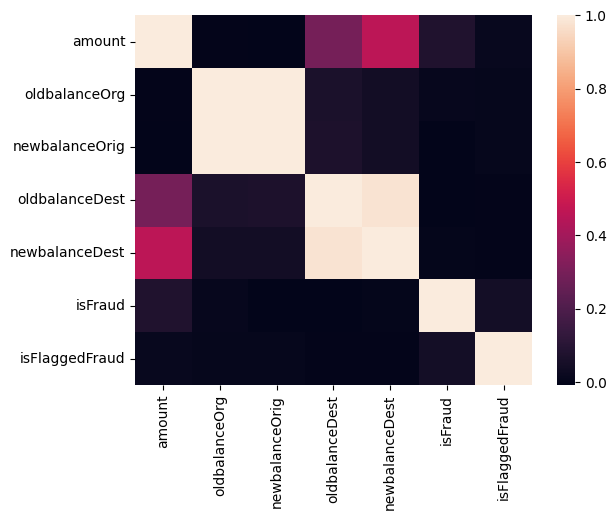

In [30]:
df1=df.drop(['type','nameOrig','nameDest','step'],axis=1)
sns.heatmap(df1.corr())

In [31]:
df['isFraud'].value_counts()

isFraud
0    6354407
1       8213
Name: count, dtype: int64

In [32]:
X = df.drop(['type','nameOrig','nameDest','step','isFraud','isFlaggedFraud'],axis=1)
y = df['isFraud']
X

,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest
0,9839.64,170136.00,160296.36,0.00,0.00
1,1864.28,21249.00,19384.72,0.00,0.00
2,181.00,181.00,0.00,0.00,0.00
3,181.00,181.00,0.00,21182.00,0.00
4,11668.14,41554.00,29885.86,0.00,0.00
...,...,...,...,...,...
6362615,339682.13,339682.13,0.00,0.00,339682.13
6362616,6311409.28,6311409.28,0.00,0.00,0.00
6362617,6311409.28,6311409.28,0.00,68488.84,6379898.11
6362618,850002.52,850002.52,0.00,0.00,0.00


In [33]:
X_normalized = X.copy()  # Create a copy of the DataFrame

# Initialize the MinMaxScaler
scaler = MinMaxScaler()

# Apply normalization to all columns in the DataFrame
X_normalized.iloc[:, :] = scaler.fit_transform(X_normalized)



print("Normalized DataFrame:")
print(X_normalized.head())

Normalized DataFrame:
     amount  oldbalanceOrg  newbalanceOrig  oldbalanceDest  newbalanceDest
0  0.000106       0.002855        0.003233        0.000000             0.0
1  0.000020       0.000357        0.000391        0.000000             0.0
2  0.000002       0.000003        0.000000        0.000000             0.0
3  0.000002       0.000003        0.000000        0.000059             0.0
4  0.000126       0.000697        0.000603        0.000000             0.0


In [34]:
for x in X_normalized:
    print(f"{x} : max = {max(X_normalized[x])} , min : {min(X_normalized[x])}")

amount : max = 1.0 , min : 0.0
oldbalanceOrg : max = 1.0 , min : 0.0
newbalanceOrig : max = 1.0 , min : 0.0
oldbalanceDest : max = 1.0 , min : 0.0
newbalanceDest : max = 1.0 , min : 0.0


In [35]:
X_normalized = X.copy()  # Create a copy of the DataFrame

# Initialize the StandardScaler
scaler = StandardScaler()

# Apply normalization to the entire DataFrame
X_normalized.iloc[:, :] = scaler.fit_transform(X_normalized)


print("\nNormalized DataFrame:")
print(X_normalized.head())


Normalized DataFrame:
     amount  oldbalanceOrg  newbalanceOrig  oldbalanceDest  newbalanceDest
0 -0.281560      -0.229810       -0.237622       -0.323814       -0.333411
1 -0.294767      -0.281359       -0.285812       -0.323814       -0.333411
2 -0.297555      -0.288654       -0.292442       -0.323814       -0.333411
3 -0.297555      -0.288654       -0.292442       -0.317582       -0.333411
4 -0.278532      -0.274329       -0.282221       -0.323814       -0.333411


In [36]:
for x in X_normalized:
    print(f"{x} : max = {max(X_normalized[x])} , min : {min(X_normalized[x])}")

amount : max = 152.79358163840354 , min : -0.29785454318914306
oldbalanceOrg : max = 20.341490841916475 , min : -0.2887164494136342
newbalanceOrig : max = 16.665226476776944 , min : -0.2924417070759528
oldbalanceDest : max = 104.41200635922532 , min : -0.323813895241792
newbalanceDest : max = 96.60910545255533 , min : -0.333411405469162


In [37]:
# Perform stratified split
test_size = 0.2  # Adjust the test size as needed
random_state = 42  # Set a random state for reproducibility

X_train, X_test, y_train, y_test = train_test_split(
    X_normalized, y, test_size=test_size, random_state=random_state, stratify=y
)
# Display the class distribution in the training and testing sets
print("Class distribution in the original dataset:")
print(y.value_counts())

print("\nClass distribution in the training set:")
print(y_train.value_counts())

print("\nClass distribution in the testing set:")
print(y_test.value_counts())

Class distribution in the original dataset:
isFraud
0    6354407
1       8213
Name: count, dtype: int64

Class distribution in the training set:
isFraud
0    5083526
1       6570
Name: count, dtype: int64

Class distribution in the testing set:
isFraud
0    1270881
1       1643
Name: count, dtype: int64


In [30]:
lr = LogisticRegression(solver='newton-cg')

#Setting the range for class weights
weights = np.linspace(0.0,0.99,200)

#Creating a dictionary grid for grid search
param_grid = {'class_weight': [{0:x, 1:1.0-x} for x in weights]}

#Fitting grid search to the train data with 5 folds
gridsearch = GridSearchCV(estimator= lr, 
                          param_grid= param_grid,
                          cv=StratifiedKFold(), 
                          n_jobs=-1, 
                          scoring='f1', 
                          verbose=2).fit(X_train, y_train)

#Ploting the score for different values of weight
sns.set_style('whitegrid')
plt.figure(figsize=(12,8))
weigh_data = pd.DataFrame({ 'score': gridsearch.cv_results_['mean_test_score'], 'weight': (1- weights)})
sns.lineplot(weigh_data['weight'], weigh_data['score'])
plt.xlabel('Weight for class 1')
plt.ylabel('F1 score')
plt.xticks([round(i/10,1) for i in range(0,11,1)])
plt.title('Scoring for different class weights', fontsize=24)

Fitting 5 folds for each of 200 candidates, totalling 1000 fits


In [38]:


# Define class weights (assuming binary classification)
class_weights = {0: 0.05, 1: 10}  # Adjust the weights based on the class distribution and the impact of misclassifications

# Initialize the Random Forest classifier with class weights
rf_classifier = RandomForestClassifier(class_weight=class_weights, random_state=42)

# Train the classifier
rf_classifier.fit(X_train, y_train)

# Predict on the testing set
y_pred = rf_classifier.predict(X_test)

# Evaluate the classifier
print(classification_report(y_test, y_pred))

# Calculate the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

# Calculate the F1 score
f1 = f1_score(y_test, y_pred)
print("F1 Score:", f1)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00   1270881
           1       0.94      0.73      0.82      1643

    accuracy                           1.00   1272524
   macro avg       0.97      0.87      0.91   1272524
weighted avg       1.00      1.00      1.00   1272524

Confusion Matrix:
[[1270801      80]
 [    438    1205]]
F1 Score: 0.8230874316939891


In [39]:

# Calculate the class imbalance ratio
class_ratio = sum(y_train == 0) / sum(y_train == 1)

# Initialize the XGBoost classifier with the scale_pos_weight parameter
xgb_classifier = xgb.XGBClassifier(scale_pos_weight=class_ratio)

# Train the classifier
xgb_classifier.fit(X_train, y_train)

# Predict on the testing set
y_pred = xgb_classifier.predict(X_test)

# Evaluate the classifier
print(classification_report(y_test, y_pred))

# Calculate the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

# Calculate the F1 score
f1 = f1_score(y_test, y_pred)
print("F1 Score:", f1)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00   1270881
           1       0.28      0.99      0.43      1643

    accuracy                           1.00   1272524
   macro avg       0.64      0.99      0.72   1272524
weighted avg       1.00      1.00      1.00   1272524

Confusion Matrix:
[[1266684    4197]
 [     20    1623]]
F1 Score: 0.43494573227924427


In [21]:
# Get the parameters of the XGBoost classifier
params = xgb_classifier.get_params()

# Print the parameters
print(params)

{'objective': 'binary:logistic', 'base_score': None, 'booster': None, 'callbacks': None, 'colsample_bylevel': None, 'colsample_bynode': None, 'colsample_bytree': None, 'device': None, 'early_stopping_rounds': None, 'enable_categorical': False, 'eval_metric': None, 'feature_types': None, 'gamma': None, 'grow_policy': None, 'importance_type': None, 'interaction_constraints': None, 'learning_rate': None, 'max_bin': None, 'max_cat_threshold': None, 'max_cat_to_onehot': None, 'max_delta_step': None, 'max_depth': None, 'max_leaves': None, 'min_child_weight': None, 'missing': nan, 'monotone_constraints': None, 'multi_strategy': None, 'n_estimators': None, 'n_jobs': None, 'num_parallel_tree': None, 'random_state': None, 'reg_alpha': None, 'reg_lambda': None, 'sampling_method': None, 'scale_pos_weight': 771.0455028060064, 'subsample': None, 'tree_method': None, 'validate_parameters': None, 'verbosity': None}


In [40]:

# Initialize the AdaBoost classifier
adaboost_classifier = AdaBoostClassifier()

# Train the classifier
adaboost_classifier.fit(X_train, y_train)

# Predict on the testing set
y_pred = adaboost_classifier.predict(X_test)

# Evaluate the classifier
print(classification_report(y_test, y_pred))

# Calculate the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

# Calculate the F1 score
f1 = f1_score(y_test, y_pred)
print("F1 Score:", f1)

d:\projects\accredian\.conda\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


              precision    recall  f1-score   support

           0       1.00      1.00      1.00   1270881
           1       0.86      0.37      0.52      1643

    accuracy                           1.00   1272524
   macro avg       0.93      0.68      0.76   1272524
weighted avg       1.00      1.00      1.00   1272524

Confusion Matrix:
[[1270786      95]
 [   1037     606]]
F1 Score: 0.5170648464163823
